In [39]:
import os
import sys
sys.path.append('..') 
import yaml
import pandas as pd
import numpy as np
import pickle
from src.utils.utils_p import YamlParser,Upload_Download_Pickle,Config_Paths
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, make_scorer
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
#parameters
turbine_order = 0 #select turbine from 0 to 9
#category = 'Pitch system' #select category
category = 'Gearbox' #select category
days = 60
testsize = 0.25

In [41]:
path=Config_Paths().get_processed_path()
cpath=Config_Paths().get_combineddatasets_path()
        
          
AllLabels_df=Upload_Download_Pickle().download_pickle(cpath, 'AllLabels_df')
AllLabels_List=Upload_Download_Pickle().download_pickle(cpath, 'AllLabels_List')
Features_df=Upload_Download_Pickle().download_pickle(cpath, 'Features_df')
Features_List=Upload_Download_Pickle().download_pickle(cpath, 'Features_List')
Labels_df=Upload_Download_Pickle().download_pickle(cpath, 'Labels_df')
Labels_List=Upload_Download_Pickle().download_pickle(cpath, 'Labels_List')

In [42]:
AllLabels_df.columns

Index(['Brake system', 'Brake systemEv', 'Brake systemEv_multiclass',
       'Components', 'Components_multiclass', 'Converter', 'ConverterEv',
       'ConverterEv_multiclass', 'Events', 'Events_0', 'Events_EVENT_001',
       'Events_EVENT_014', 'Events_EVENT_015', 'Events_EVENT_016',
       'Events_EVENT_019', 'Events_EVENT_027', 'Events_EVENT_028',
       'Events_EVENT_031', 'Events_EVENT_034', 'Events_EVENT_035',
       'Events_EVENT_045', 'Events_EVENT_051', 'Events_EVENT_052',
       'Events_EVENT_053', 'Events_EVENT_054', 'Events_EVENT_060',
       'Events_EVENT_062', 'Events_EVENT_063', 'Events_EVENT_071',
       'Events_EVENT_077', 'Events_EVENT_097', 'Events_EVENT_102',
       'Events_EVENT_106', 'Events_EVENT_108', 'Events_EVENT_113',
       'Events_EVENT_114', 'Events_EVENT_118', 'Events_EVENT_121',
       'Events_EVENT_124', 'Events_EVENT_134', 'Events_EVENT_137',
       'Events_EVENT_141', 'Events_EVENT_142', 'Events_EVENT_144',
       'Events_EVENT_149', 'Events_EVENT_150

In [35]:
features = Features_List[turbine_order]
labels = Labels_List[turbine_order]

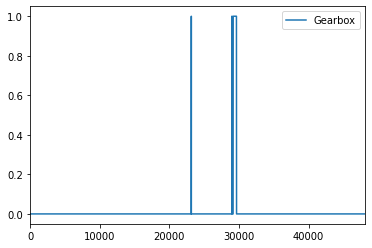

In [36]:
labels.plot()

In [38]:
labels[labels.Gearbox==1]

,Gearbox
23156,1
23157,1
23158,1
23159,1
23160,1
...,...
29644,1
29645,1
29646,1
29647,1


In [33]:
#144=6*24(saat)
for index_ in labels.index:
    if labels[category][index_] == 1:
        labels[category][index_] = days*144
        if index_-days*144 >= 0:
            for i in range(index_-days*144, index_+1):
                if labels[category][i]==0:
                    labels[category][i] = i - (index_-days*144) + 1
        else:
            for i in range(index_+1):
                if labels[category][i]<=0:
                    labels[category][i] = i + 1

KeyboardInterrupt: 

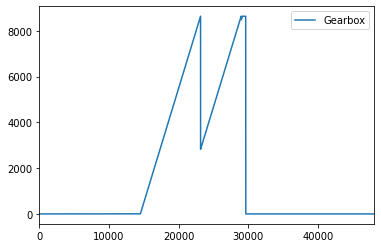

In [9]:
labels.plot()

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=testsize,shuffle=False)
X_train = X_train.drop(columns=['Period','Events_binary','TURBINE_NUMBER'])
X_test = X_test.drop(columns=['Period','Events_binary','TURBINE_NUMBER'])

reg = LinearRegression()
reg.fit(X_train,y_train)

y_pred = reg.predict(X_test)
y_pred_train = reg.predict(X_train)

from sklearn.metrics import r2_score

r2_score(y_pred,y_test)

#mse(y_test,y_pred)

-0.4368003916637848

In [18]:
import numpy as np
from numpy import convolve
import matplotlib.pyplot as plt

def movingaverage (values, window):
    values_ = np.zeros(len(values))
    for i in range(1,len(values)):
        if i - window <= 0:
            values_[i] = np.sum(values[0:i])/i
        else:
            values_[i] = np.sum(values[i-window:i])/window+1
    return values_

#def movingaverage (values, window):
#    weights = (np.repeat(1.0, window)/int(window/2-window/2%2))
#    weights = weights[int(window/2-window/2%2):-1]
#    print(weights.shape)
#    print(values.shape)
#    counter = 0
#    sma = np.convolve(values, weights, 'same')
#    return sma,weights

window = 144

y_pred_ma = movingaverage(y_pred,window)
y_pred_train_ma = movingaverage(y_pred_train,window)

display(r2_score(y_pred,y_test))
display(r2_score(y_pred_ma,y_test))

-0.49727170668564646

-0.5198834692497463

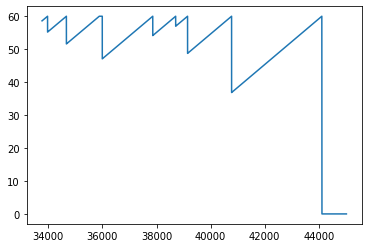

In [19]:
plt.plot((y_test/144))

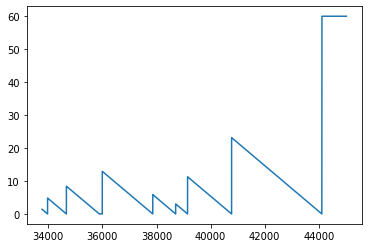

In [20]:
plt.plot(days - (y_test/144))

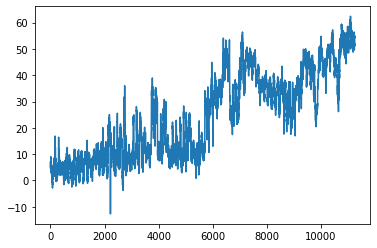

In [21]:
plt.plot(days - (y_pred/144))

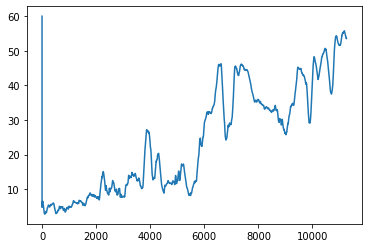

In [22]:
plt.plot(days - (y_pred_ma/144))

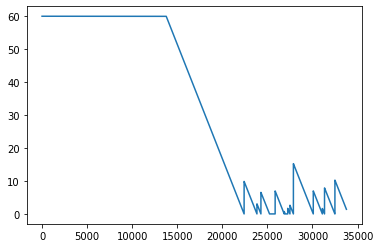

In [14]:
plt.plot(days - (y_train/144))

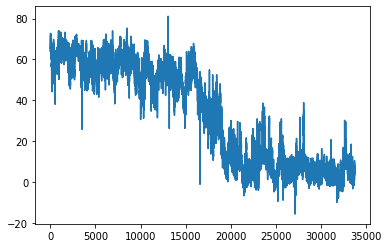

In [15]:
plt.plot(days - (y_pred_train/144))

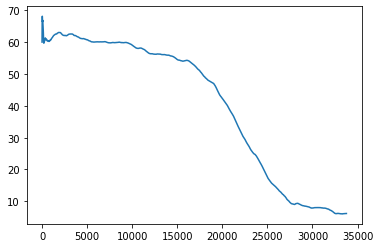

In [16]:
plt.plot(days - (y_pred_train_ma/144))